In [18]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow

### **EXERCISE 01**

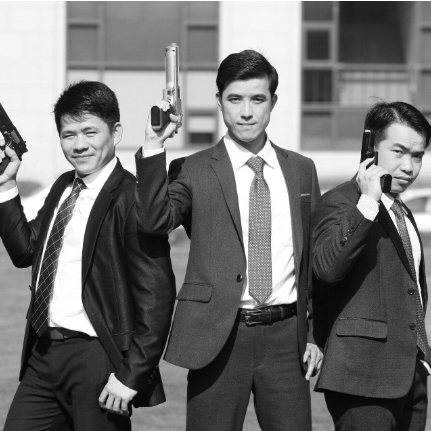

In [46]:
img = cv.imread('data/lab03_01.jpg')
cv2_imshow(img)

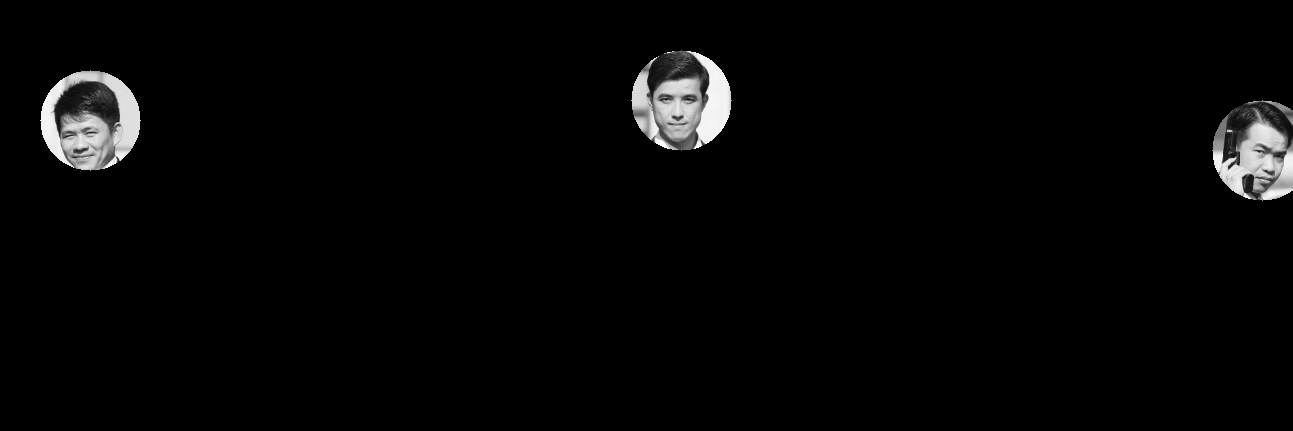

In [48]:
mask_01 = np.zeros(img.shape[:2], dtype="uint8")
mask_02 = np.zeros(img.shape[:2], dtype="uint8")
mask_03 = np.zeros(img.shape[:2], dtype="uint8")

cv.circle(mask_01, (90, 120), 50, 255, -1)
cv.circle(mask_02, (250, 100), 50, 255, -1)
cv.circle(mask_03, (400, 150), 50, 255, -1)

mask = [mask_01, mask_02, mask_03]
masked_list = []

for i in range(0, 3) :
  masked = cv.bitwise_and(img, img, mask=mask[i])
  masked_list.append(masked)

out = np.hstack((masked_list[0], masked_list[1], masked_list[2]))

cv2_imshow(out)

### **EXERCISE 02**

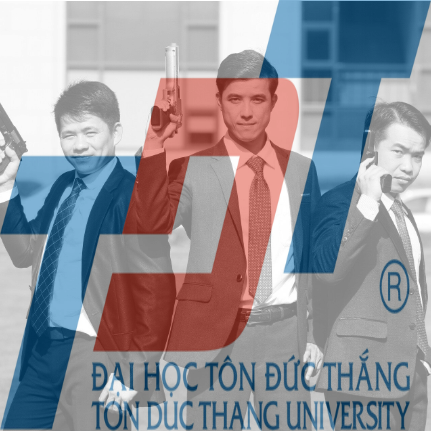

In [23]:
img_01 = cv.imread('data/lab03_01.jpg')
img_02 = cv.imread('data/lab03_02.jpg')

img_02 = cv.resize(img_02, img_01.shape[1::-1])

out = cv.addWeighted(img_01, 0.5, img_02, 0.5, 0)
cv2_imshow(out)

### **EXERCISE 03**

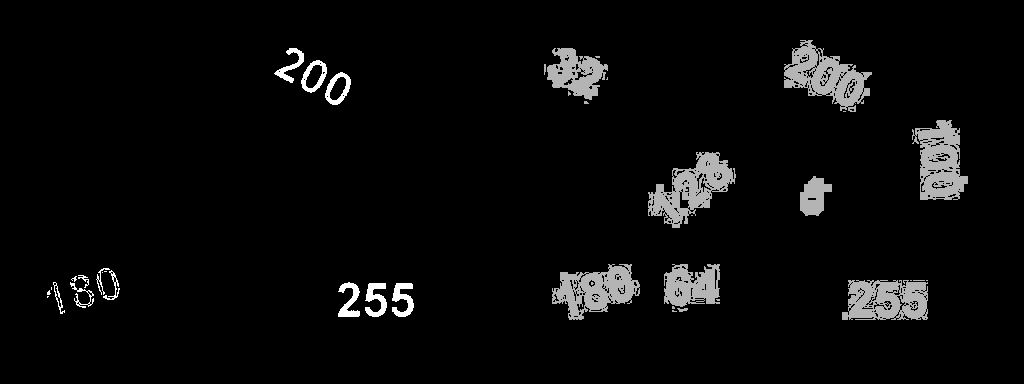

In [20]:
img_01 = cv.imread('data/lab03_03.jpg')
img_02 = cv.imread('data/lab03_03.jpg')

gray_img = cv.cvtColor(img_01, cv.COLOR_BGR2GRAY)

r1, binary_img_01 = cv.threshold(gray_img, 180, 255, cv.THRESH_BINARY)

r2, binary_img_02 = cv.threshold(gray_img, 0, 180, cv.THRESH_BINARY)

#---Dilate
k_dilate = cv.getStructuringElement(cv.MORPH_RECT, (4,4))
dilate_01 = cv.dilate(binary_img_01, k_dilate, iterations=5)
dilate_02 = cv.dilate(binary_img_02, k_dilate, iterations=5)

out = np.hstack((binary_img_01, binary_img_02))
cv2_imshow(out)

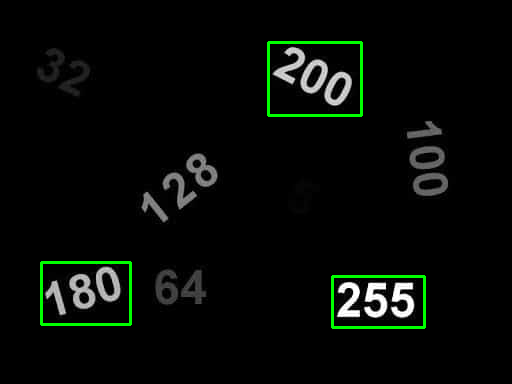

In [21]:
canny_img_01 = cv.Canny(dilate_01, 30, 200)
c_number, h = cv.findContours(canny_img_01, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for i in c_number :
  (x, y, w, h) = cv.boundingRect(i)
  minArea = cv.minAreaRect(i)
  box = minArea[1][0] * minArea[1][1]
  if box > 1 :
    cv.rectangle(img_01, (x,y), (x+w, y+h), (0,255,0), 2)
    
cv2_imshow(img_01)

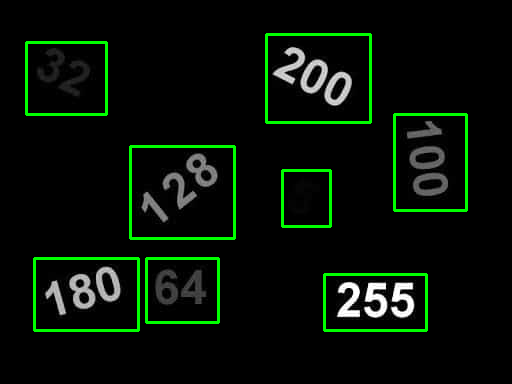

In [22]:
canny_img_02 = cv.Canny(dilate_02, 30, 200)
c_number, h = cv.findContours(canny_img_02, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for i in c_number :
  (x, y, w, h) = cv.boundingRect(i)
  minArea = cv.minAreaRect(i)
  box = minArea[1][0] * minArea[1][1]
  if box > 1 :
    cv.rectangle(img_02, (x,y), (x+w, y+h), (0,255,0), 2)
    
cv2_imshow(img_02)